In [1]:
import streamlit as st
from pathlib import Path
import pandas as pd
from utils.load_data import Dataload, filter_by_date_for_model, add_city_name
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.load_charts import *
from IPython.display import Image
import folium
from folium.plugins import HeatMap
from streamlit_folium import folium_static
import os
from datetime import datetime, timedelta

from pathlib import Path
# from utils.ressources import *
# from utils.load_and_apply_model import *
from utils.load_data import filter_by_date
from utils.load_and_apply_model import *

In [2]:
from sklearn.metrics import classification_report
from joblib import dump, load
from pathlib import Path
import json

from utils.load_data import Dataload

In [3]:
current_path = Path.cwd()

In [7]:
df_dataviz = current_path / "data" / "df_dataviz.csv"
df_city = current_path / "data" / "data_features_city.csv"
path_images = current_path / "assets" / "images" / "features"
df_data_features_path = current_path / "data" / "data_features_webapp.csv"
path_model = current_path / "models"
table_city = current_path / "data" / "table_city.csv"

In [4]:
current_path = Path.cwd()
sunny_icon_path = current_path / "assets" / "images" / "sunny-svg-2.png"
rainfall_icon_path = current_path / "assets" / "images" / "raincloud2.png"

In [6]:
sunny_icon_path

WindowsPath('C:/Users/benme/Documents/datascientest/projet/australia_weather_forecasts/webapp/assets/images/sunny-svg-2.png')

In [7]:
def instantiate_model(model_name):
    # Charger les paramètres depuis le fichier JSON
    with open(PARAM_MODELS, 'r') as f:
        params = json.load(f)[model_name.__name__]

    # Créer un modèle avec les paramètres spécifiés
    model = model_name(**params)

    # Retourner le modèle
    return model

In [8]:
df_data_features = Dataload(df_data_features_path).load_df()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
def instantiate_model(model_name):
    # Charger les paramètres depuis le fichier JSON
    with open(PARAM_MODELS, 'r') as f:
        params = json.load(f)[model_name.__name__]

    # Créer un modèle avec les paramètres spécifiés
    model = model_name(**params)

    # Retourner le modèle
    return model

In [21]:
model_random_forest = instantiate_model(RandomForestClassifier)

In [18]:
df_data_features = Dataload(df_data_features_path).load_df()

In [19]:
df_data_features

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,winddir9am_cos,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.9,44.0,22.0,1007.1,2008,1,12,24.0,9.5,7.0,...,-1.000000e+00,8.0,1.224647e-16,-36.065766,0,0,7.6,20.0,-1.000000e+00,0
1,12.9,44.0,25.0,1007.8,2008,2,12,22.0,17.7,1.0,...,-3.826834e-01,1.0,9.238795e-01,-36.065766,0,0,12.0,4.0,-9.238795e-01,0
2,8.0,46.0,30.0,1008.7,2008,3,12,26.0,12.8,2.0,...,-1.000000e+00,7.0,1.224647e-16,-36.065766,0,0,8.0,19.0,-9.238795e-01,0
3,2.2,24.0,16.0,1012.8,2008,4,12,9.0,18.8,6.0,...,7.071068e-01,8.0,-7.071068e-01,-36.065766,0,0,10.0,11.0,7.071068e-01,0
4,6.7,41.0,33.0,1006.0,2008,5,12,20.0,14.8,8.0,...,9.238795e-01,7.0,3.826834e-01,-36.065766,0,0,4.8,7.0,-1.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72702,10.9,31.0,12.0,1010.3,2016,19,4,11.0,21.7,4.0,...,1.000000e+00,3.0,0.000000e+00,-24.997901,2,0,9.6,9.0,-9.238795e-01,0
72703,9.9,31.0,24.0,1013.8,2016,20,4,19.0,12.9,1.0,...,-1.836970e-16,8.0,-1.000000e+00,-24.997901,2,0,8.0,17.0,-3.826834e-01,0
72704,11.0,31.0,21.0,1017.9,2016,24,4,19.0,15.2,0.0,...,9.238795e-01,0.0,3.826834e-01,-24.997901,2,0,8.2,22.0,1.000000e+00,0
72705,11.0,30.0,13.0,1017.1,2016,25,4,9.0,19.2,0.0,...,1.000000e+00,0.0,0.000000e+00,-24.997901,2,0,7.8,13.0,1.000000e+00,0


In [9]:
df_chaud_humide = df_data_features[df_data_features.climat == 0]
df_chaud_humide.to_csv(current_path / "data" /"df_chaud_humide.csv")
df_chaud_humide_path = current_path / "data" /"df_chaud_humide.csv"

In [10]:
df_tempere_froid = df_data_features[df_data_features.climat == 2]
df_tempere_froid.to_csv(current_path / "data" /"df_tempere_froid.csv")
df_tempere_froid_path = current_path / "data" /"df_tempere_froid.csv"

In [11]:
df_mediterraneen = df_data_features[df_data_features.climat == 3]
df_mediterraneen.to_csv(current_path / "data" /"df_mediterraneen.csv")
df_mediterraneen_path = current_path / "data" /"df_mediterraneen.csv"

In [12]:
df_sec = df_data_features[df_data_features.climat == 1]
df_sec.to_csv(current_path / "data" /"df_sec.csv")
df_sec_path = current_path / "data" /"df_sec.csv"

In [13]:
df_local = df_data_features[df_data_features.geography == 3]
df_local.to_csv(current_path / "data" /"df_local.csv")
df_local_path = current_path / "data" /"df_local.csv"

In [14]:
def train_model(model, dataset):
    # Séparer les données en entrées et étiquettes de classe
    X_train, X_test, y_train, y_test = Dataload(dataset).split_data_train_test()
    # Entraîner le modèle
    model.fit(X_train, y_train)
    # Retourner le modèle entraîné
    print("Model trained")
    return model

In [15]:
# Stockage des dataframes dans une liste avec leur nom
df_list = [("df_chaud_humide", df_chaud_humide),
           ("df_tempere_froid", df_tempere_froid),
           ("df_mediterraneen", df_mediterraneen),
           ("df_sec", df_sec),
           ("df_local", df_local)]


In [22]:
model_chaud_humide = train_model(model_random_forest, df_chaud_humide_path)
model_tempere_froid = train_model(model_random_forest, df_tempere_froid_path)
model_mediterraneen = train_model(model_random_forest, df_mediterraneen_path)
model_sec = train_model(model_random_forest, df_sec_path)
model_local = train_model(model_random_forest, df_local_path)

Model trained
Model trained
Model trained
Model trained
Model trained


In [22]:
def save_model(model, local_model_name):
    # Sauvegarder le modèle entraîné en utilisant joblib
    model_name = model.__class__.__name__ + "_" + local_model_name
    model_filename = f"{model_name.lower()}_model.joblib"
    dump(model, path_model / model_filename)
    print("Model saved")

In [23]:
save_model(model_chaud_humide, "chaud_humide")
save_model(model_tempere_froid, "tempere_froid")
save_model(model_mediterraneen, "mediterraneen")
save_model(model_sec, "sec")
save_model(model_local, "local")

Model saved
Model saved
Model saved
Model saved
Model saved


In [24]:
path_model = current_path / "models"

In [25]:
model_chaud_humide = load_model(path_model / "randomforestclassifier_chaud_humide_model.joblib")
model_tempere_froid = load_model(path_model / "randomforestclassifier_tempere_froid_model.joblib")
model_mediterraneen = load_model(path_model / "randomforestclassifier_mediterraneen_model.joblib")
model_sec = load_model(path_model / "randomforestclassifier_sec_model.joblib")
model_local = load_model(path_model / "randomforestclassifier_local_model.joblib")

Model loaded
Model loaded
Model loaded
Model loaded
Model loaded


In [26]:
df_filtered_date_chaud_humide = filter_by_date_for_model(df_chaud_humide, "12/02/2010")

C:\Users\benme\Documents\datascientest\projet\australia_weather_forecasts\webapp\utils\load_data.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dd['year'] = df_dd['year'].astype(int)
C:\Users\benme\Documents\datascientest\projet\australia_weather_forecasts\webapp\utils\load_data.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dd['month'] = df_dd['month'].astype(int)
C:\Users\benme\Documents\datascientest\projet\australia_weather_forecasts\webapp\utils\load_data.py:67: SettingWithCopyWarning

In [23]:
def apply_model(model, dataset):
    if dataset.columns.str.contains('raintomorrow').any():
        dataset = dataset.drop(columns='raintomorrow', axis=1)
    if dataset.columns.str.contains('date').any():
        dataset = dataset.drop(columns='date', axis=1)
    predictions = model.predict(dataset)
    prediction_scores = model.predict_proba(dataset)
    print("apply_model done")
    dataset['raintomorrow'] = predictions
    return dataset

In [28]:
df_chaud_humide.shape

(30281, 26)

In [24]:
prediction_chaud_humide = apply_model(model_chaud_humide, df_chaud_humide)
prediction_tempere_froid = apply_model(model_tempere_froid, df_tempere_froid)
prediction_mediterraneen = apply_model(model_mediterraneen, df_mediterraneen)
prediction_sec = apply_model(model_sec, df_sec)
prediction_local = apply_model(model_local, df_local)

apply_model done
apply_model done
apply_model done
apply_model done
apply_model done


In [30]:
scores_chaud_humide = evaluate_model(model_chaud_humide, df_chaud_humide_path)
scores_tempere_froid = evaluate_model(model_tempere_froid, df_tempere_froid_path)
scores_mediterraneen = evaluate_model(model_mediterraneen, df_mediterraneen_path)
scores_sec = evaluate_model(model_sec, df_sec_path)
scores_local = evaluate_model(model_local, df_local_path)

Accuracy: 86.61 %
F1-score (weighted): 83.14 %
evaluate_model done
Accuracy: 84.65 %
F1-score (weighted): 82.10 %
evaluate_model done
Accuracy: 86.01 %
F1-score (weighted): 82.91 %
evaluate_model done
Accuracy: 92.18 %
F1-score (weighted): 90.09 %
evaluate_model done
Accuracy: 81.00 %
F1-score (weighted): 78.62 %
evaluate_model done


In [31]:
def display_map_rain(df_in, day, today=True):
    # Création de la carte centrée sur l'Australie avec le fond de carte Stamen Terrain
    df_filter = filter_by_date(df_in, day)
    df_filter = add_city_name(df_filter)
    # Carte centrée sur l'Australie
    m = folium.Map(location=[-25.2744, 133.7751], zoom_start=3)

    if today:
        # Déterminer les icônes en fonction de la valeur de raintomorrow
        conditions = [
            df_filter['raintoday'] == 0,
            df_filter['raintoday'] == 1
        ]
    else:
        # Déterminer les icônes en fonction de la valeur de raintomorrow
        conditions = [
            df_filter['raintomorrow'] == 0,
            df_filter['raintomorrow'] == 1
        ]
    icon_paths = [str(sunny_icon_path), str(rainfall_icon_path)]

    # Ajouter les marqueurs à la carte avec les icônes personnalisées
    for condition, icon_path in zip(conditions, icon_paths):
        filtered_data = df_filter[condition]
        for _, row in filtered_data.iterrows():
            lat = row['latitude']  # Latitude
            lon = row['longitude']  # Longitude
            location = row['location']  # Nom de la ville
            icon = folium.CustomIcon(icon_image=icon_path, icon_size=(40, 40))
            marker = folium.Marker(location=[lat, lon], icon=icon)
            marker.add_child(folium.Tooltip(location))
            marker.add_to(m)

    # Afficher la carte dans le notebook
    display(m)


In [32]:
prediction_chaud_humide

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,winddir9am_cos,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.9,44.0,22.0,1007.1,2008,1,12,24.0,9.5,7.0,...,-1.000000e+00,8.0,1.224647e-16,-36.065766,0,0,7.6,20.0,-1.000000,0
1,12.9,44.0,25.0,1007.8,2008,2,12,22.0,17.7,1.0,...,-3.826834e-01,1.0,9.238795e-01,-36.065766,0,0,12.0,4.0,-0.923880,0
2,8.0,46.0,30.0,1008.7,2008,3,12,26.0,12.8,2.0,...,-1.000000e+00,7.0,1.224647e-16,-36.065766,0,0,8.0,19.0,-0.923880,0
3,2.2,24.0,16.0,1012.8,2008,4,12,9.0,18.8,6.0,...,7.071068e-01,8.0,-7.071068e-01,-36.065766,0,0,10.0,11.0,0.707107,0
4,6.7,41.0,33.0,1006.0,2008,5,12,20.0,14.8,8.0,...,9.238795e-01,7.0,3.826834e-01,-36.065766,0,0,4.8,7.0,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72049,10.6,41.0,27.0,1014.0,2015,26,7,22.0,17.3,1.0,...,-1.836970e-16,0.0,-1.000000e+00,-14.146696,2,0,5.0,4.0,0.923880,0
72050,8.4,46.0,40.0,1015.8,2015,27,7,26.0,11.0,6.0,...,7.071068e-01,6.0,-7.071068e-01,-14.146696,2,0,8.0,17.0,0.707107,0
72051,11.0,46.0,42.0,1016.5,2015,28,7,19.0,13.3,0.0,...,7.071068e-01,0.0,-7.071068e-01,-14.146696,2,0,10.8,22.0,0.382683,0
72052,11.0,43.0,28.0,1015.0,2015,30,7,22.0,18.7,1.0,...,7.071068e-01,0.0,-7.071068e-01,-14.146696,2,0,5.8,15.0,1.000000,0



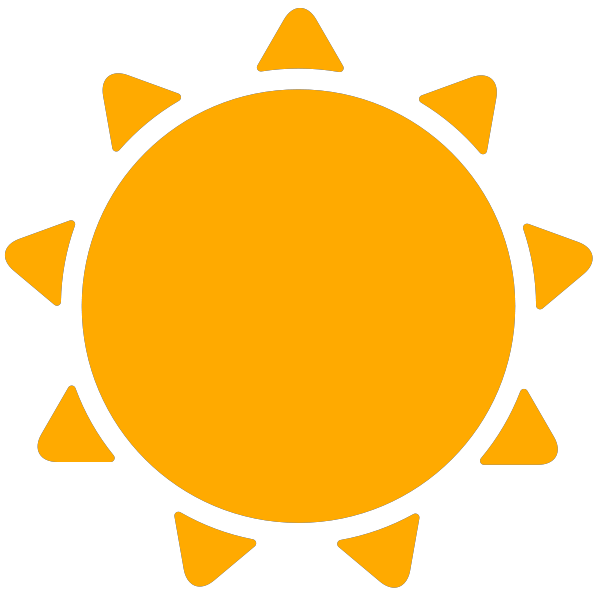
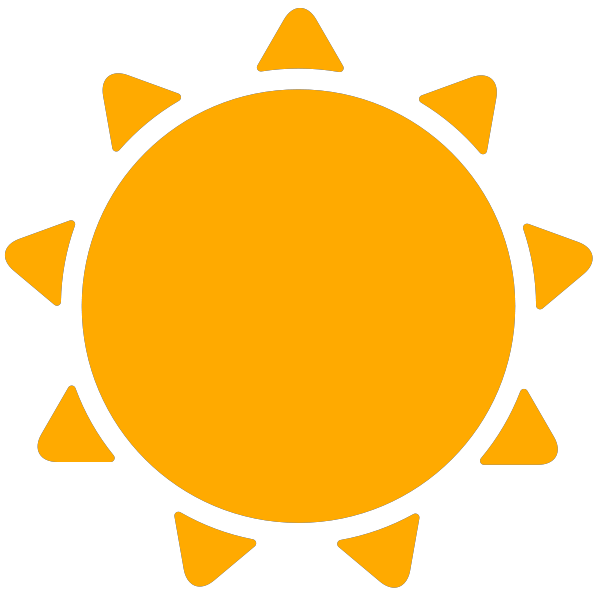
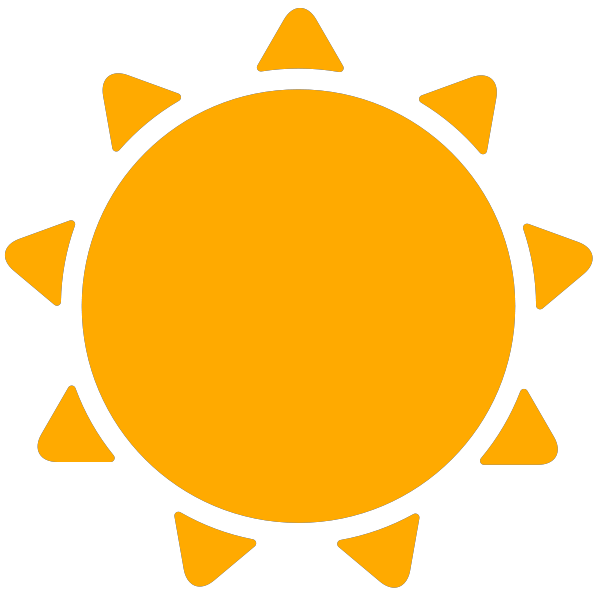
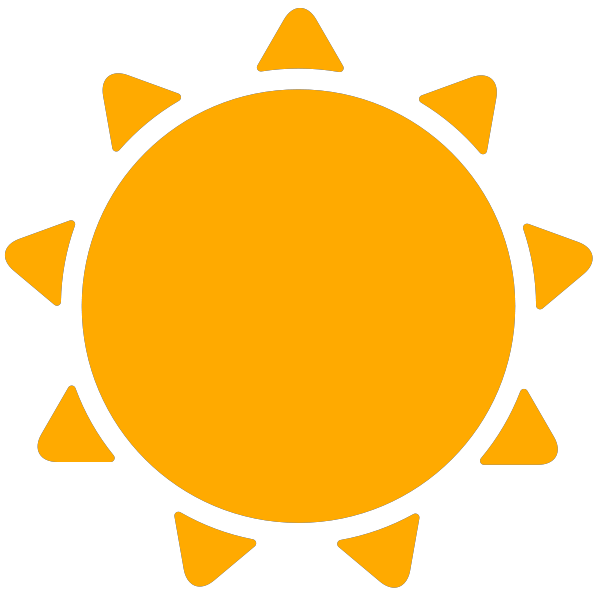
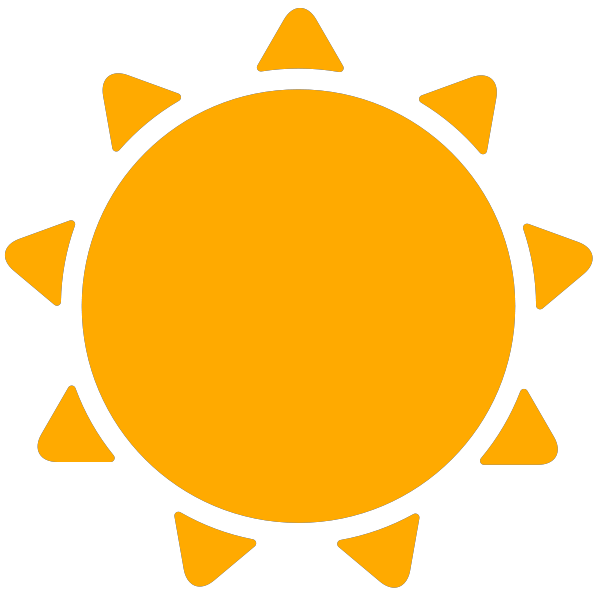
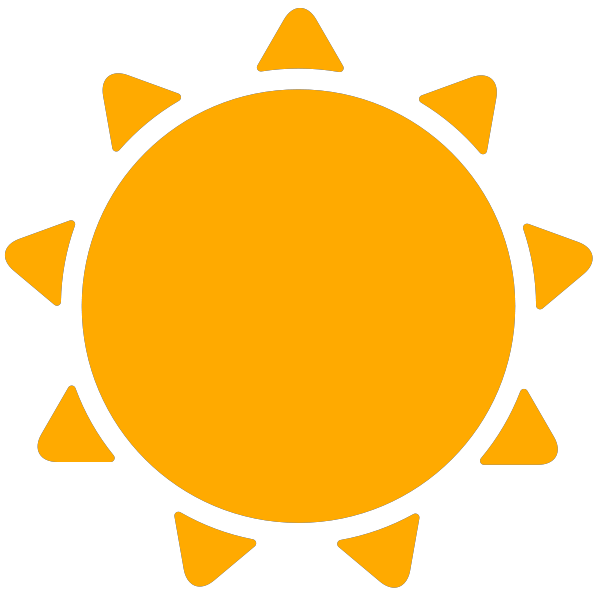
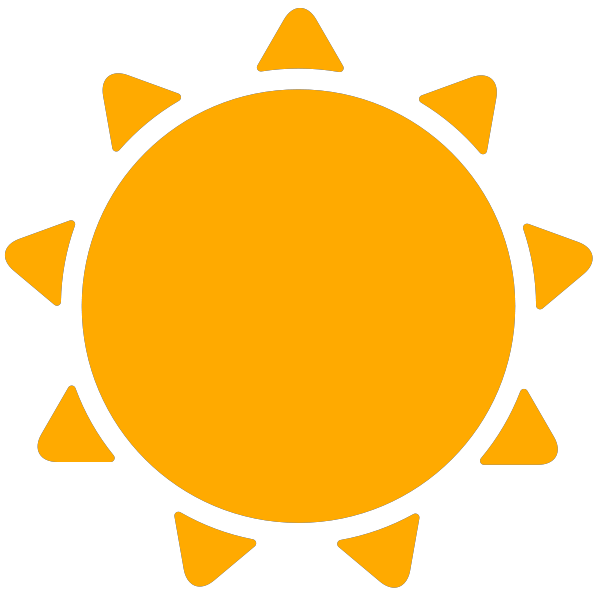
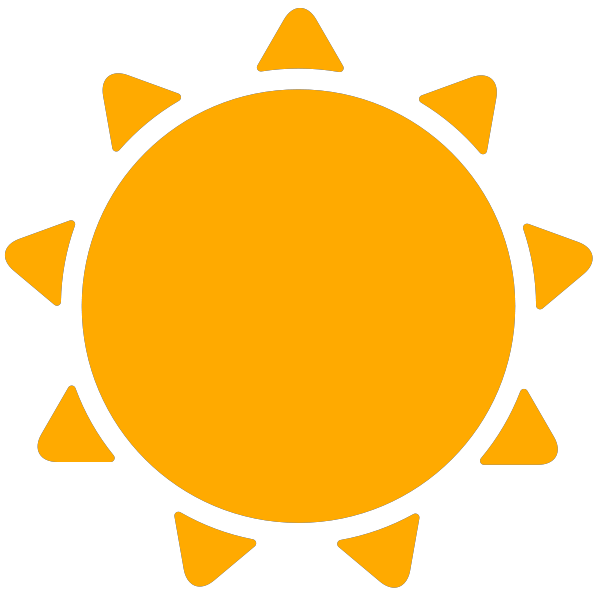
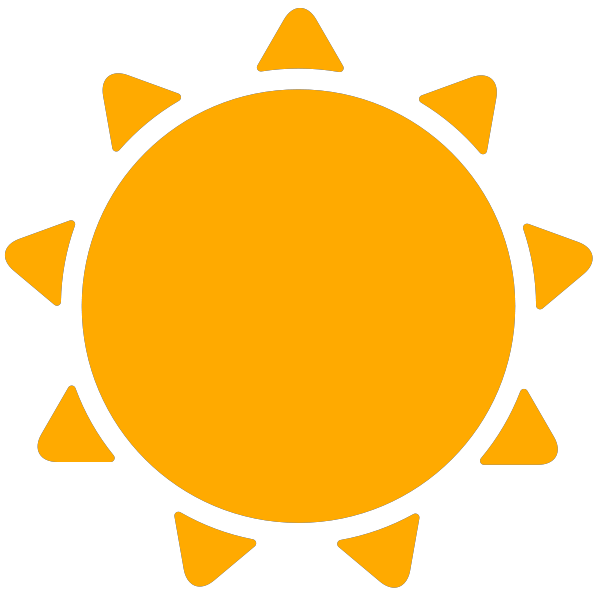
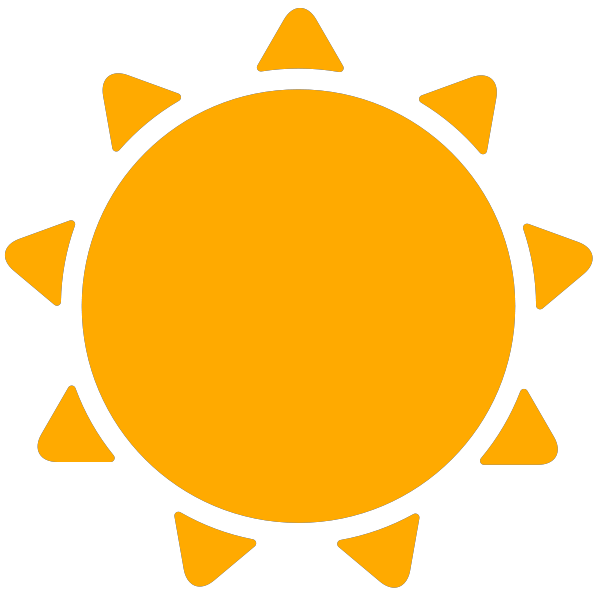
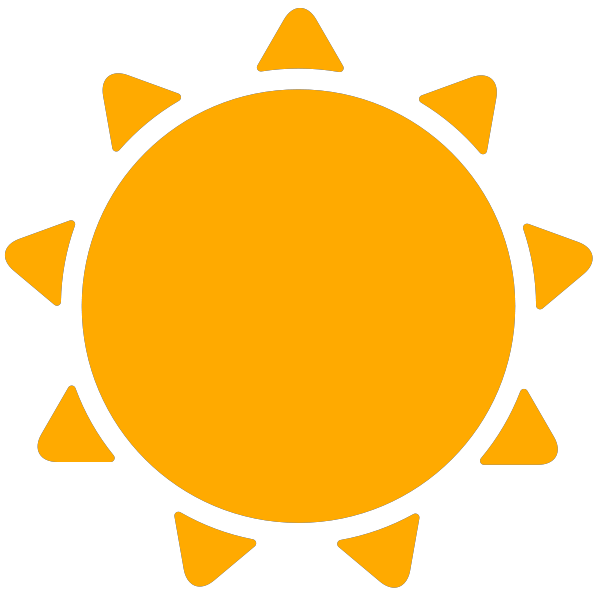
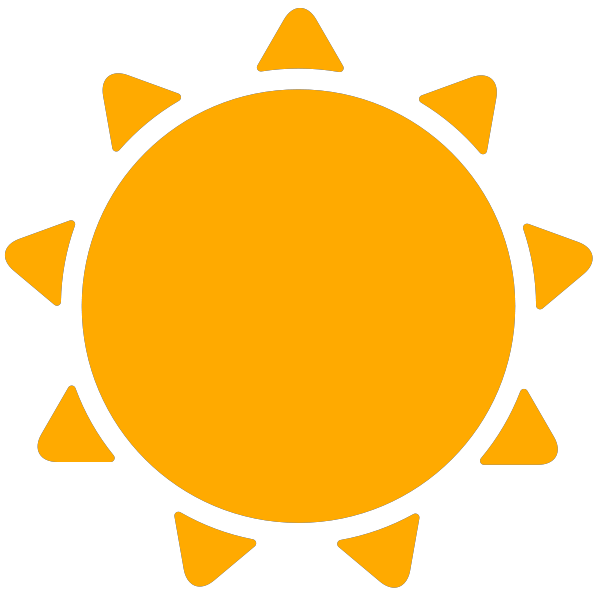
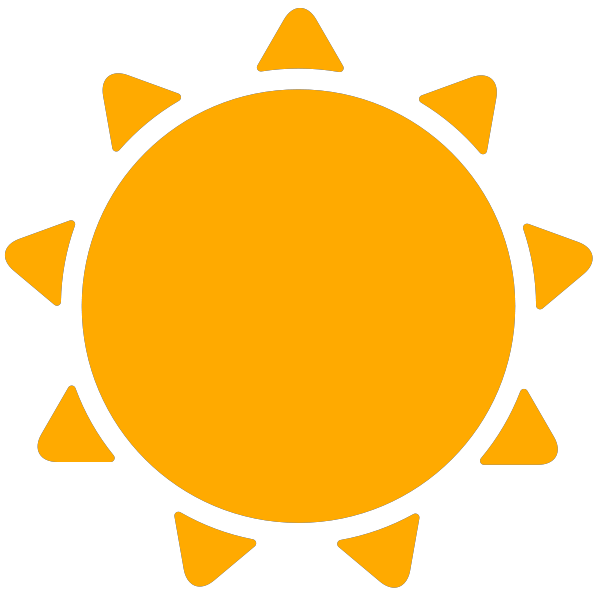
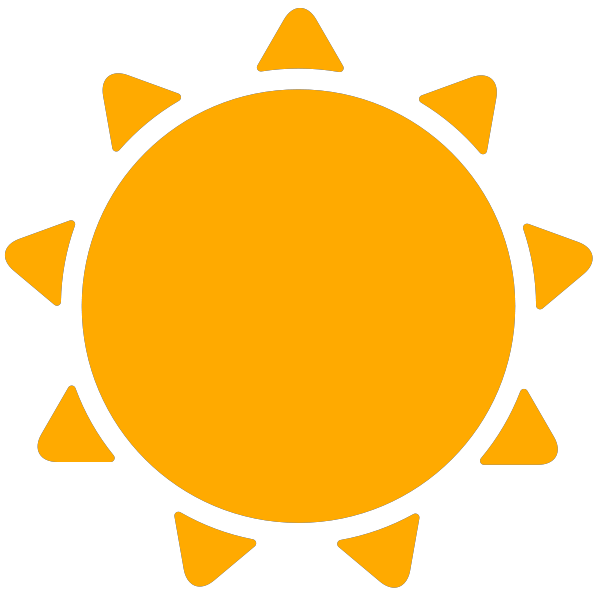
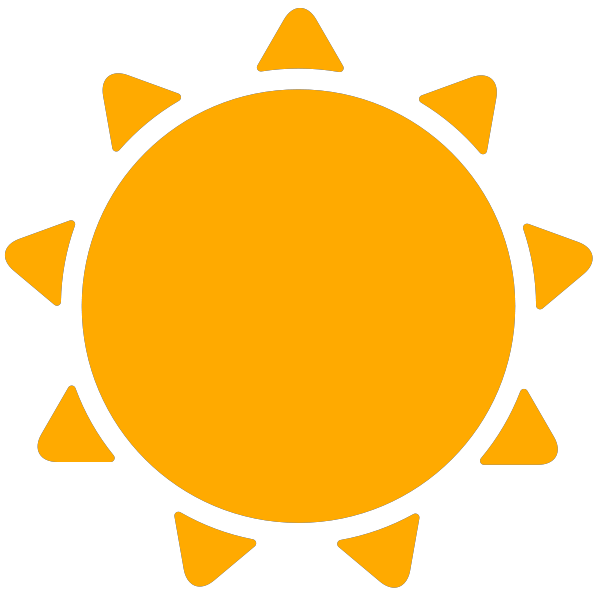

In [33]:
display_map_rain(prediction_chaud_humide, "12/04/2015", today=False)


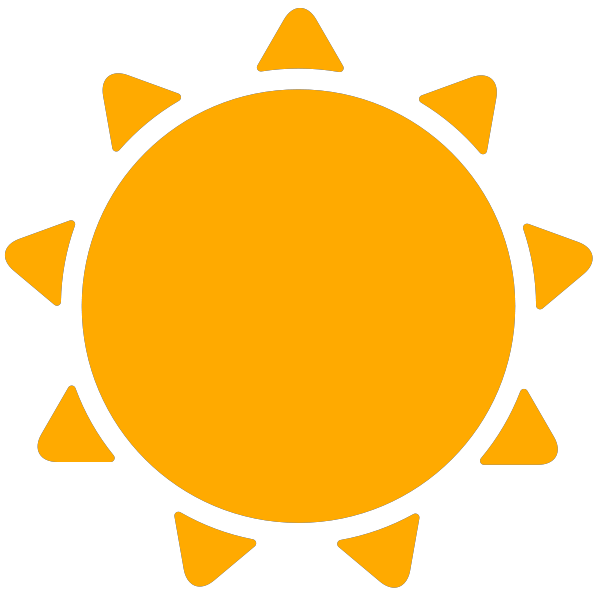
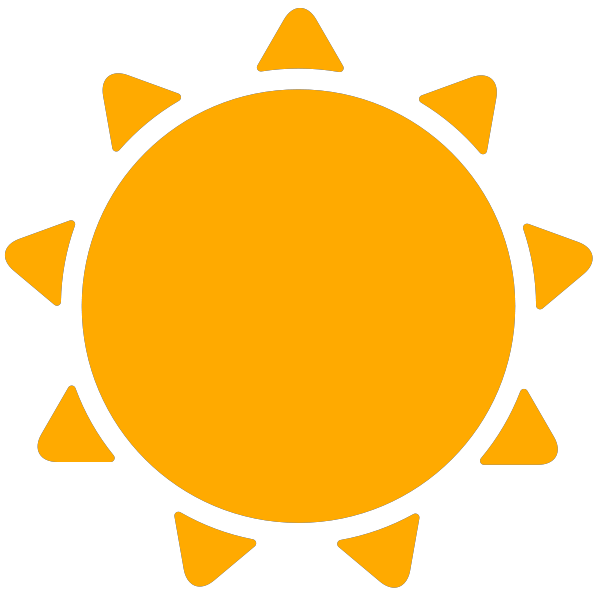
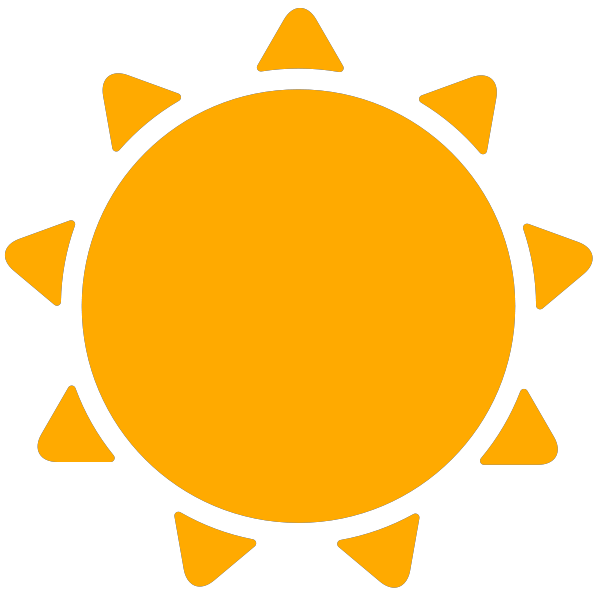
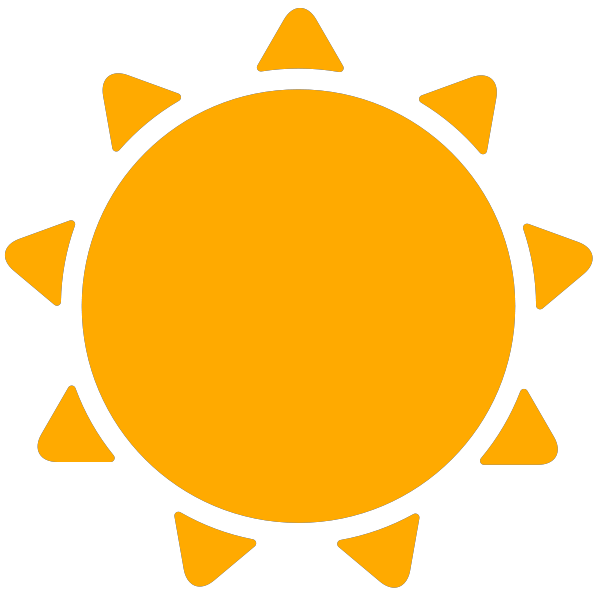
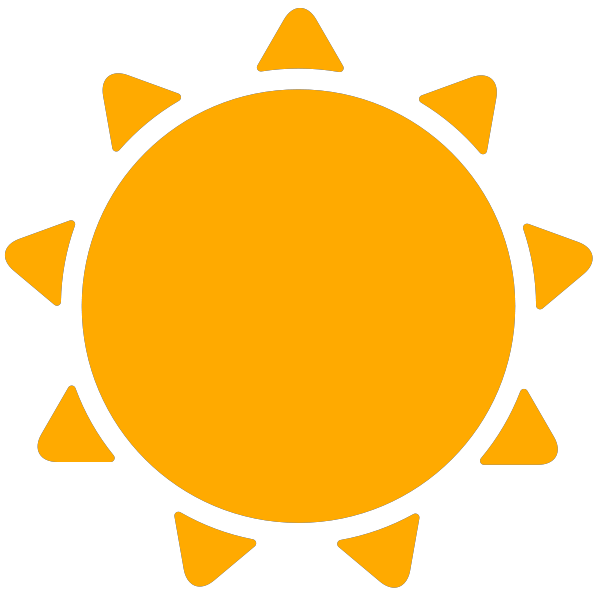
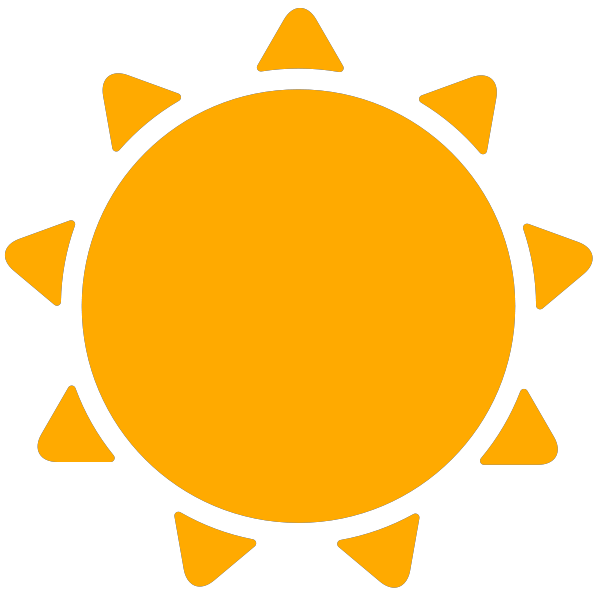
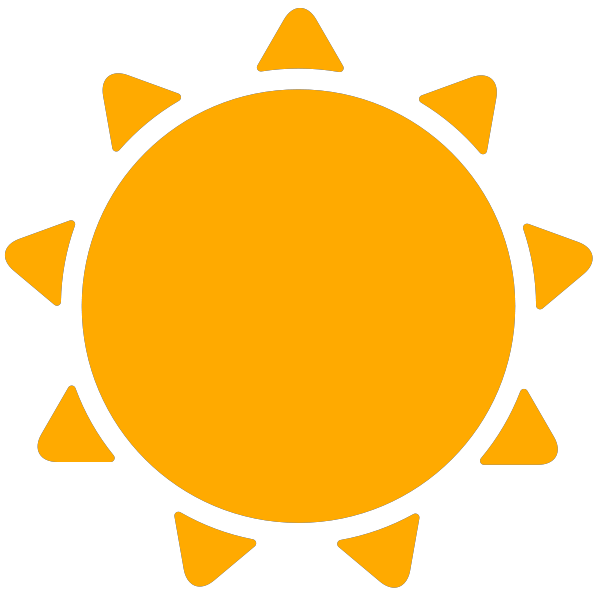
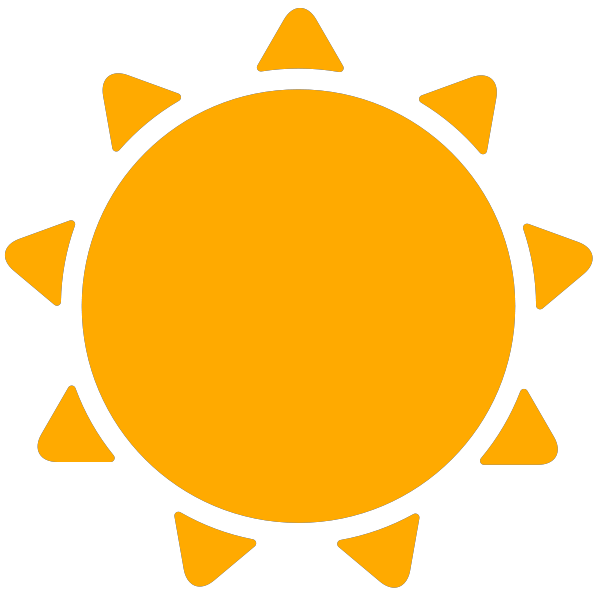
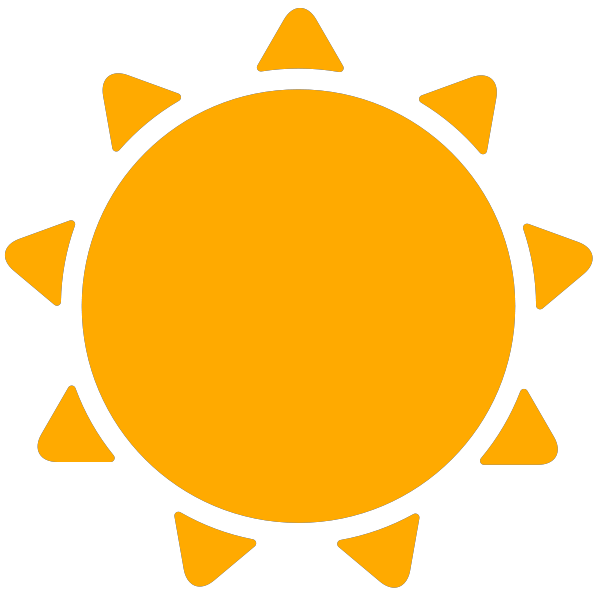
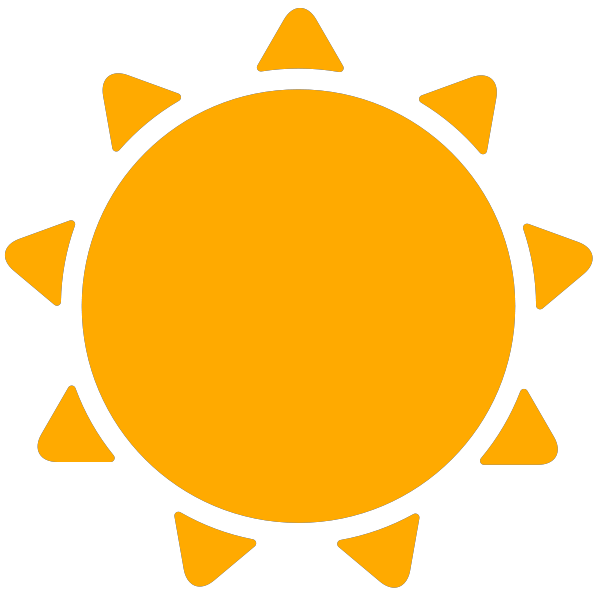
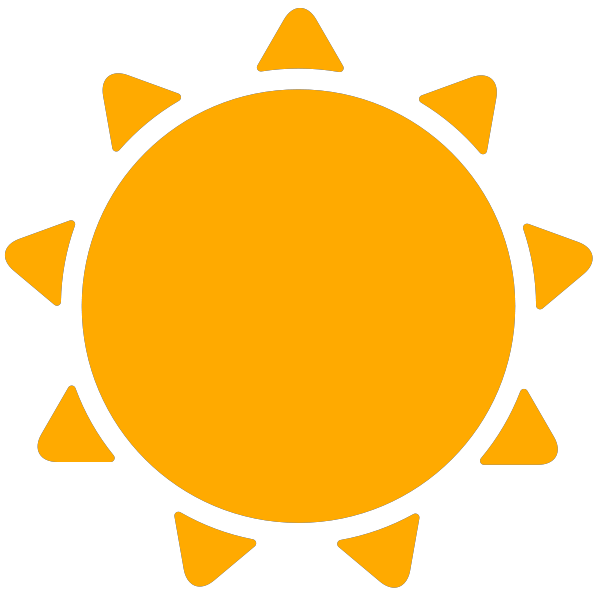
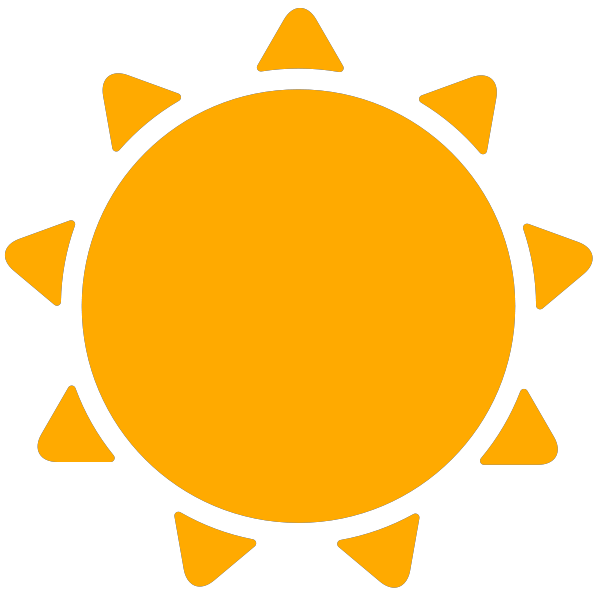
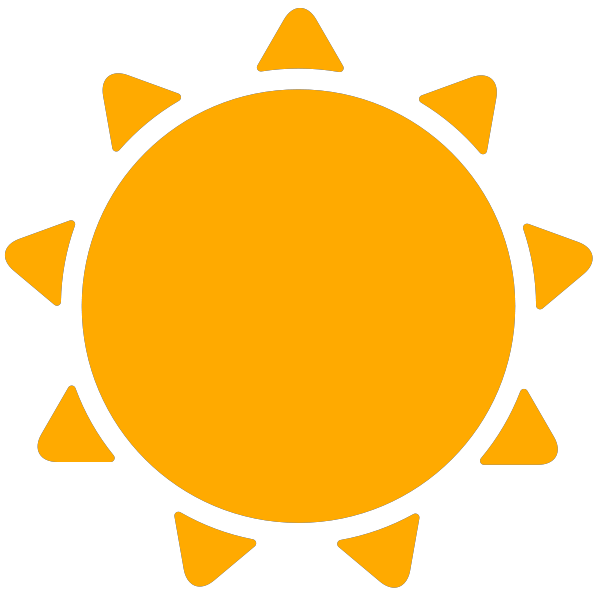
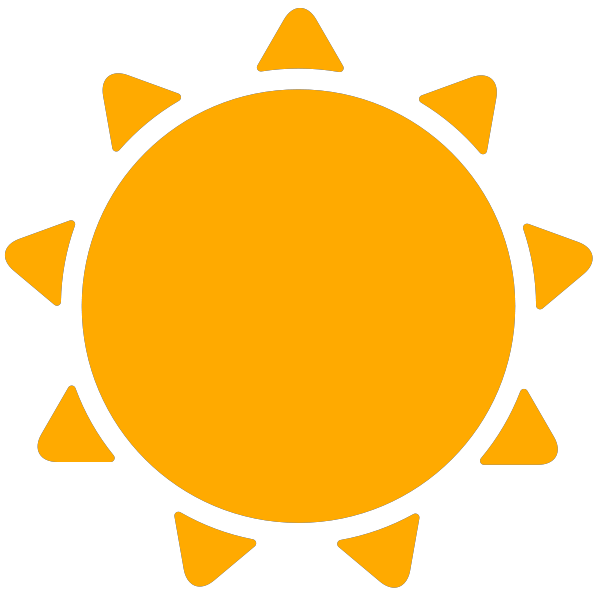
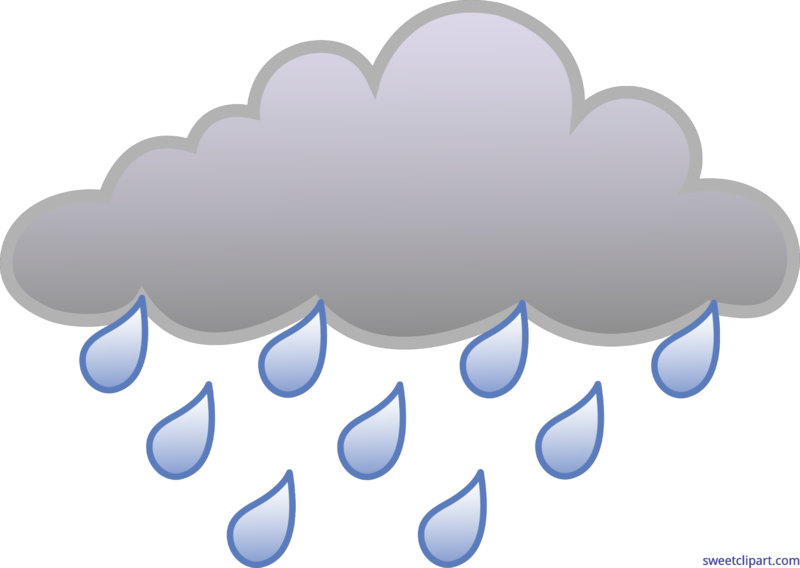

In [34]:
display_map_rain(prediction_chaud_humide, "12/04/2015", today=True)



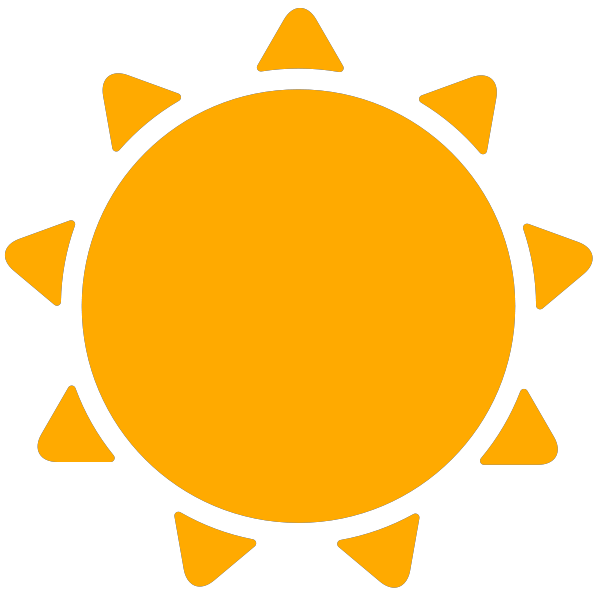
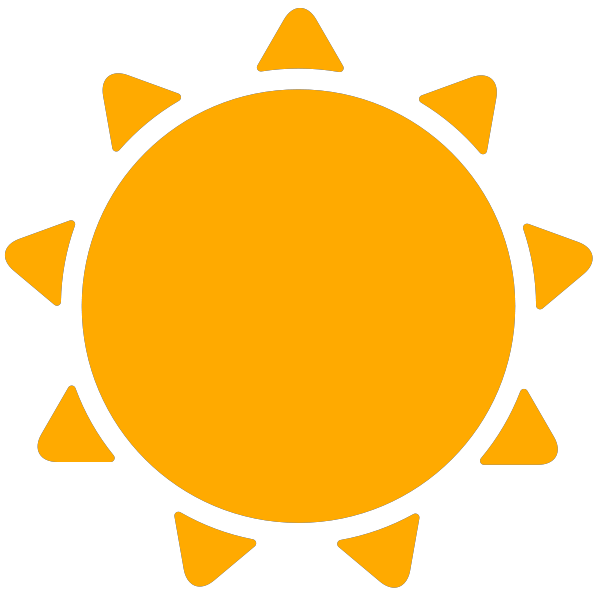
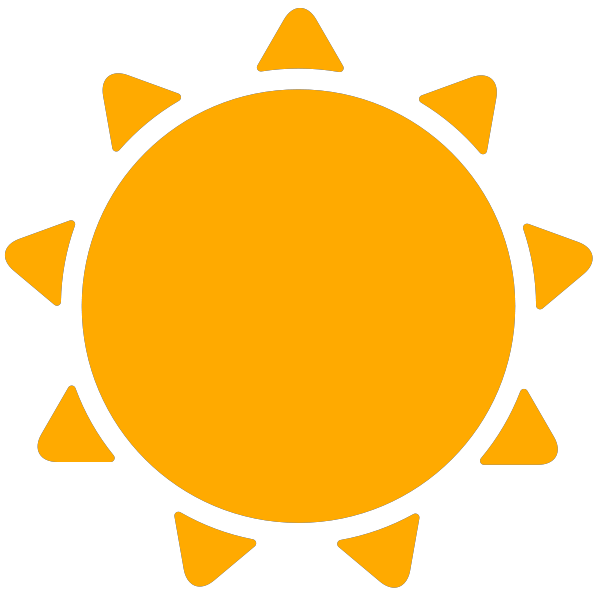
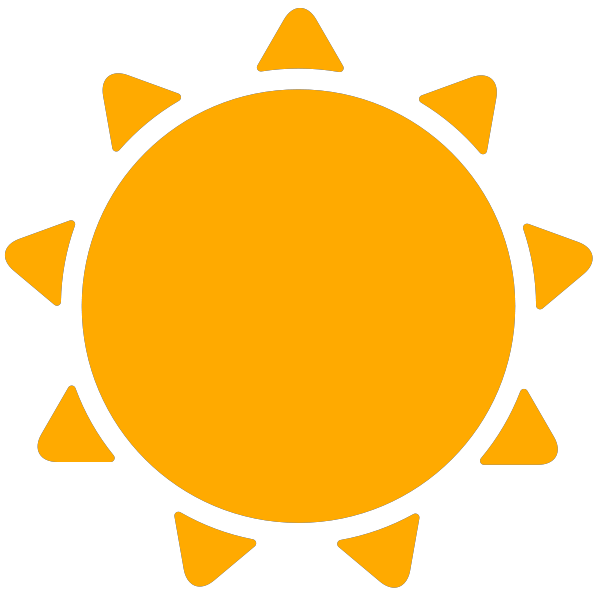
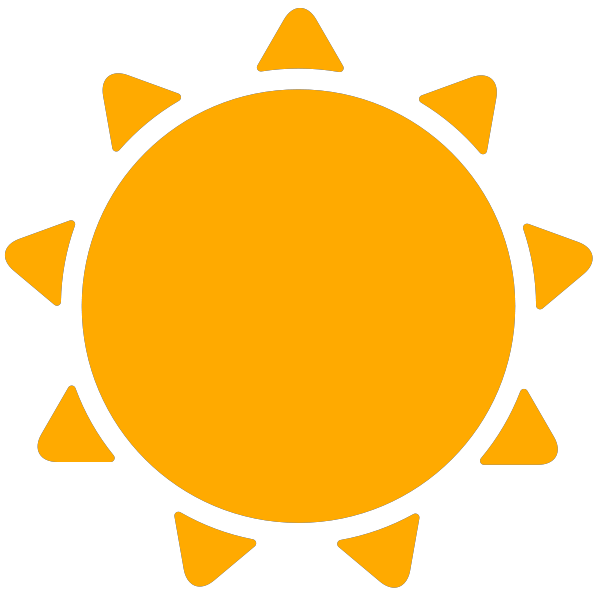
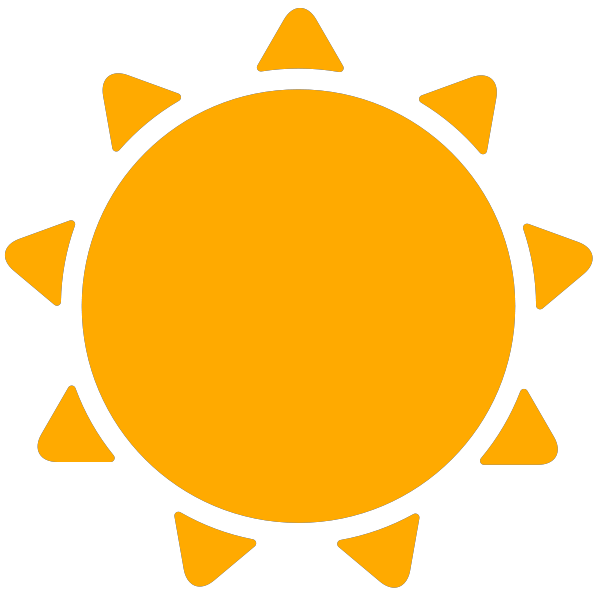
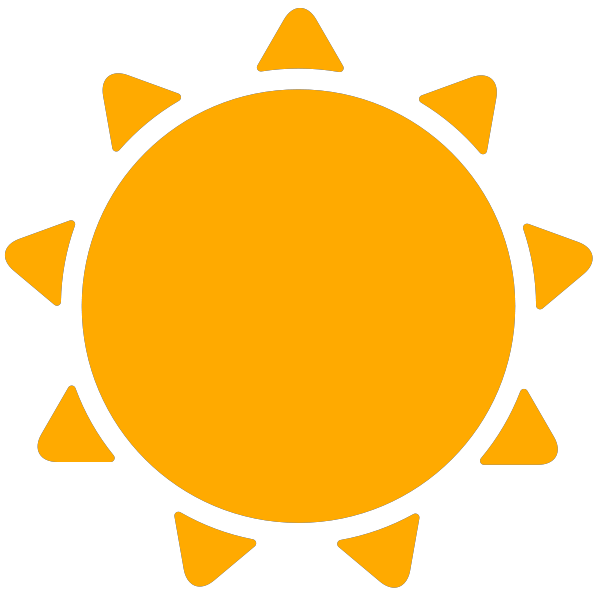
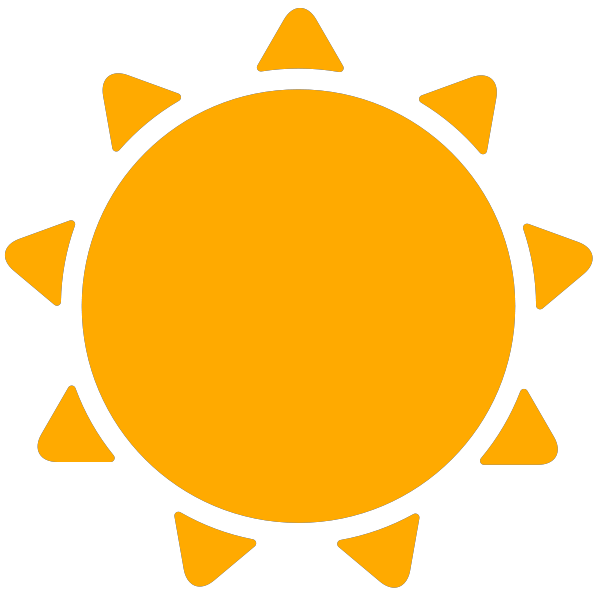
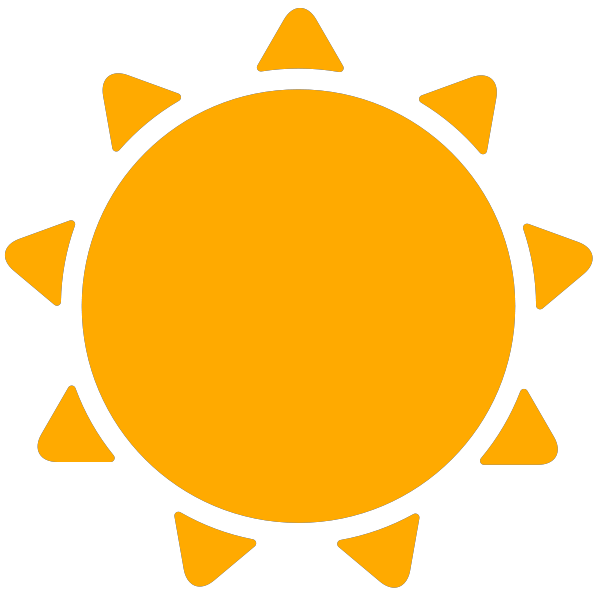
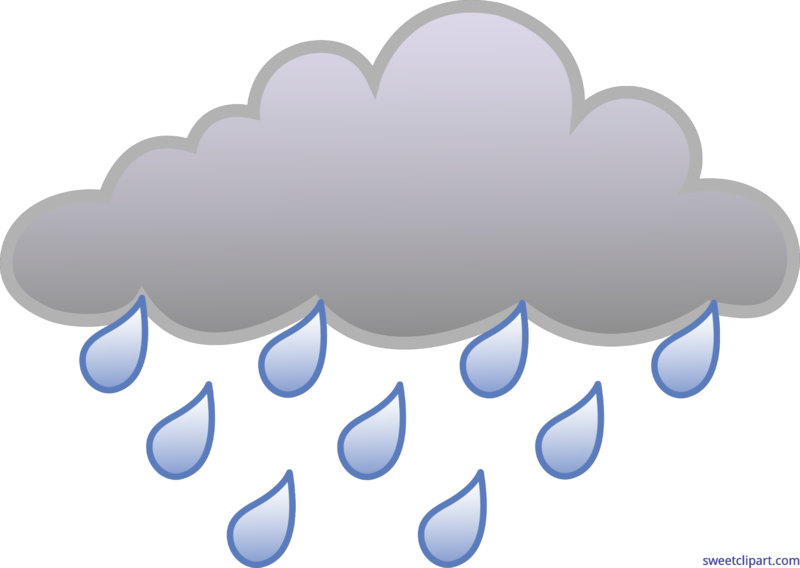
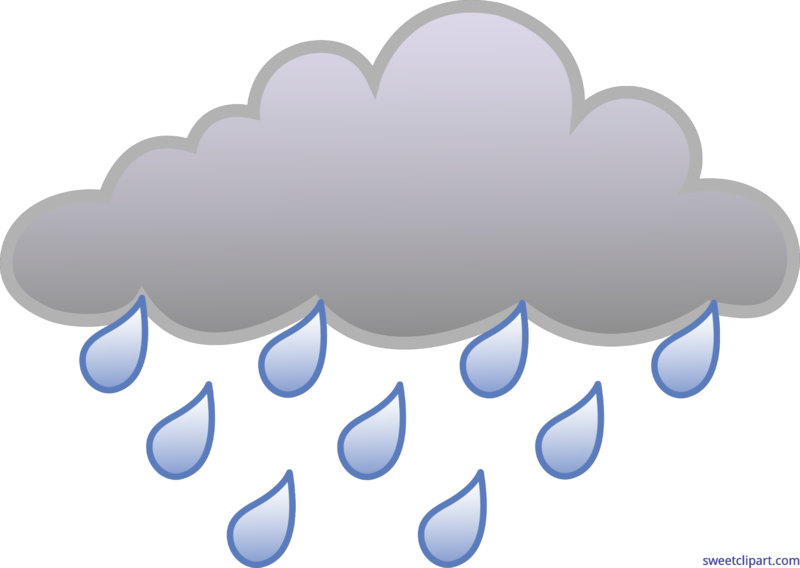
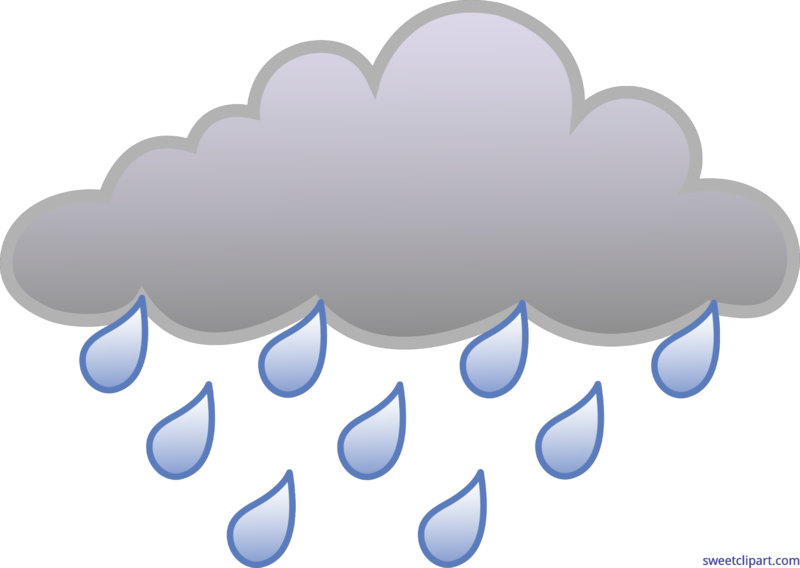

In [35]:
display_map_rain(df_data_features, "12/08/2010", today=False)



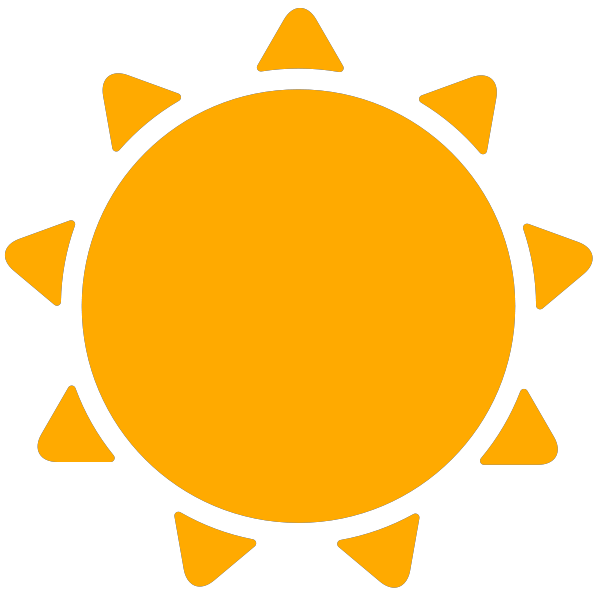
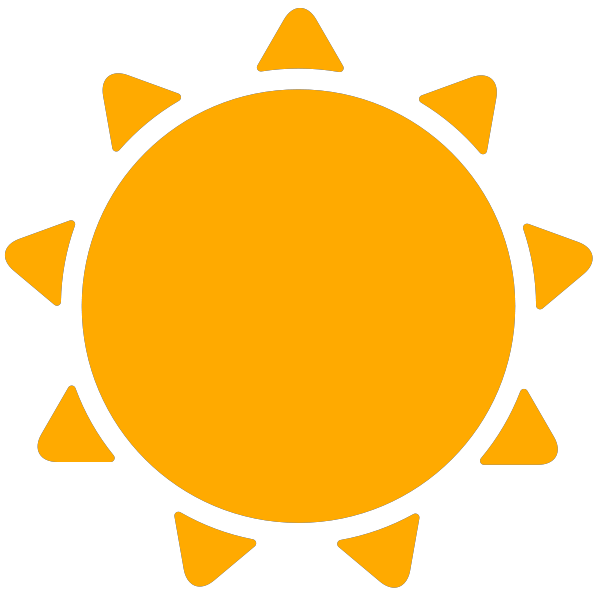
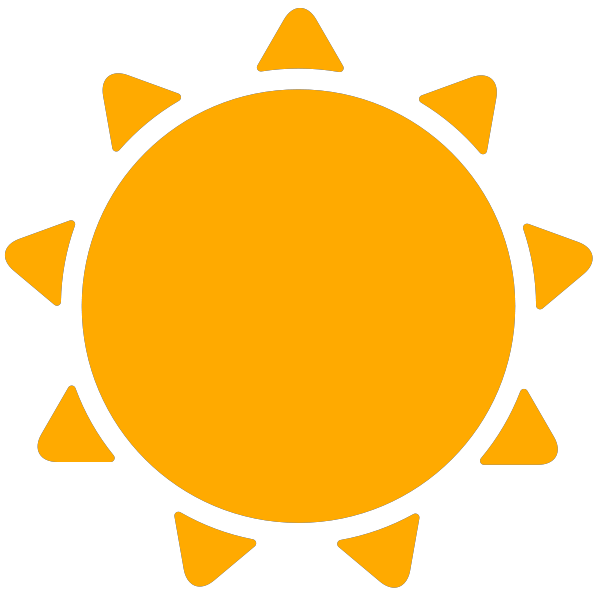
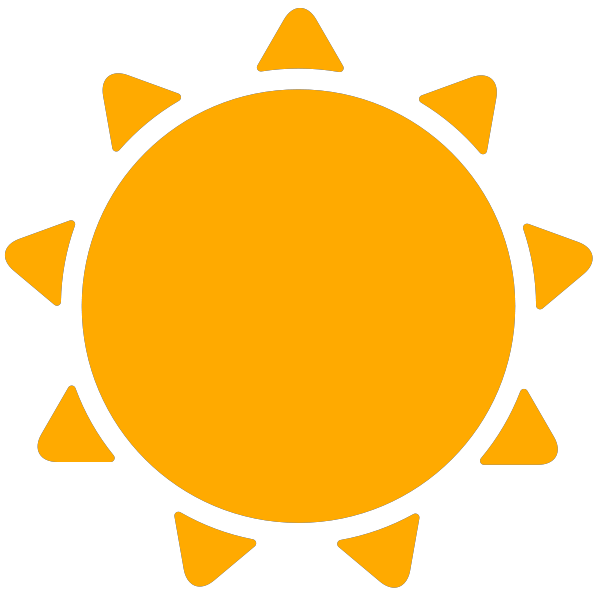
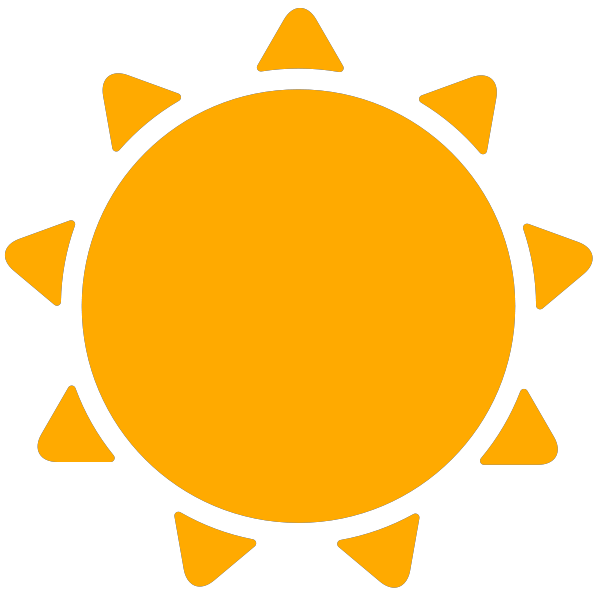

In [36]:
display_map_rain(prediction_sec, "12/08/2014", today=False)

In [37]:
climate_model = ["randomforestclassifier_model.joblib",
"randomforestclassifier_chaud_humide_model.joblib",
"randomforestclassifier_tempere_froid_model.joblib",
"randomforestclassifier_mediterraneen_model.joblib",
"randomforestclassifier_sec_model.joblib",
"randomforestclassifier_local_model.joblib"]

In [42]:
models_loaded = {}
for model in climate_model:
    temp_model = load_model(path_model / model)
    models_loaded[model.split('.')[0]] = temp_model

Model loaded
Model loaded
Model loaded
Model loaded
Model loaded
Model loaded


In [43]:
models_loaded

{'randomforestclassifier_model': RandomForestClassifier(class_weight='balanced', random_state=42),
 'randomforestclassifier_chaud_humide_model': RandomForestClassifier(class_weight='balanced', random_state=42),
 'randomforestclassifier_tempere_froid_model': RandomForestClassifier(class_weight='balanced', random_state=42),
 'randomforestclassifier_mediterraneen_model': RandomForestClassifier(class_weight='balanced', random_state=42),
 'randomforestclassifier_sec_model': RandomForestClassifier(class_weight='balanced', random_state=42),
 'randomforestclassifier_local_model': RandomForestClassifier(class_weight='balanced', random_state=42)}

In [44]:
df_data_features

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow,date
0,10.9,44.0,22.0,1007.1,2008,1,12,24.0,9.5,7.0,...,8.0,1.224647e-16,-36.065766,0,0,7.6,20.0,-1.000000e+00,0,2008-12-01
1,12.9,44.0,25.0,1007.8,2008,2,12,22.0,17.7,1.0,...,1.0,9.238795e-01,-36.065766,0,0,12.0,4.0,-9.238795e-01,0,2008-12-02
2,8.0,46.0,30.0,1008.7,2008,3,12,26.0,12.8,2.0,...,7.0,1.224647e-16,-36.065766,0,0,8.0,19.0,-9.238795e-01,0,2008-12-03
3,2.2,24.0,16.0,1012.8,2008,4,12,9.0,18.8,6.0,...,8.0,-7.071068e-01,-36.065766,0,0,10.0,11.0,7.071068e-01,0,2008-12-04
4,6.7,41.0,33.0,1006.0,2008,5,12,20.0,14.8,8.0,...,7.0,3.826834e-01,-36.065766,0,0,4.8,7.0,-1.000000e+00,0,2008-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72702,10.9,31.0,12.0,1010.3,2016,19,4,11.0,21.7,4.0,...,3.0,0.000000e+00,-24.997901,2,0,9.6,9.0,-9.238795e-01,0,2016-04-19
72703,9.9,31.0,24.0,1013.8,2016,20,4,19.0,12.9,1.0,...,8.0,-1.000000e+00,-24.997901,2,0,8.0,17.0,-3.826834e-01,0,2016-04-20
72704,11.0,31.0,21.0,1017.9,2016,24,4,19.0,15.2,0.0,...,0.0,3.826834e-01,-24.997901,2,0,8.2,22.0,1.000000e+00,0,2016-04-24
72705,11.0,30.0,13.0,1017.1,2016,25,4,9.0,19.2,0.0,...,0.0,0.000000e+00,-24.997901,2,0,7.8,13.0,1.000000e+00,0,2016-04-25


In [55]:
add_city_name(df_data_features)[['climat', 'location']]

,climat,location
0,0,Albury
1,0,Albury
2,0,Albury
3,0,Albury
4,0,Albury
...,...,...
72702,1,Uluru
72703,1,Uluru
72704,1,Uluru
72705,1,Uluru


WindowsPath('C:/Users/benme/Documents/datascientest/projet/australia_weather_forecasts/webapp/data/data_features_city.csv')

In [61]:
table_city = current_path / "data" / "table_city.csv"

In [63]:
df_city = Dataload(table_city).load_df()

In [64]:
df_city

,latitude,longitude
location,,
Albury,-36.065766,146.910315
Badgerys Creek,-33.844637,150.755176
Cobar,-31.068087,145.664408
Coffs Harbour,-30.234976,153.099084
Moree,-29.447084,149.839583
Norah Head,-33.275517,151.566867
Norfolk Island,-28.945667,167.978584
Sydney,-33.758057,151.149932
Sydney Airport,-33.947598,151.182616


In [65]:
df_climate = df_data_features.climat.unique()

In [66]:
df_climate

array([0, 1, 2, 3], dtype=int64)

In [ ]:
df_dataviz = Dataload(df_dataviz).load_df()

In [70]:
df_dataviz

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,latitude,longitude,climat_koppen,year,month,day,climat,geography,position,temp_amplitude
0,2008-12-01,Albury,13.4,22.9,0.6,7.6,10.9,W,44.0,W,...,-36.065766,146.910315,Cfa,2008,12,1,Chaud humide,valley,S,9.5
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.9,WNW,44.0,NNW,...,-36.065766,146.910315,Cfa,2008,12,2,Chaud humide,valley,S,17.7
2,2008-12-03,Albury,12.9,25.7,0.0,8.0,8.0,WSW,46.0,W,...,-36.065766,146.910315,Cfa,2008,12,3,Chaud humide,valley,S,12.8
3,2008-12-04,Albury,9.2,28.0,0.0,10.0,2.2,NE,24.0,SE,...,-36.065766,146.910315,Cfa,2008,12,4,Chaud humide,valley,S,18.8
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,6.7,W,41.0,ENE,...,-36.065766,146.910315,Cfa,2008,12,5,Chaud humide,valley,S,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145028,2016-04-20,Uluru,18.8,31.7,0.0,8.0,9.9,SSW,31.0,S,...,-24.997901,131.089241,BSh,2016,4,20,Sec,desert,S,12.9
145031,2016-04-23,Uluru,16.9,28.4,0.0,18.4,11.0,E,31.0,ESE,...,-24.997901,131.089241,BSh,2016,4,23,Sec,desert,S,11.5
145032,2016-04-24,Uluru,12.1,27.3,0.0,8.2,11.0,E,31.0,ENE,...,-24.997901,131.089241,BSh,2016,4,24,Sec,desert,S,15.2
145033,2016-04-25,Uluru,9.6,28.8,0.0,7.8,11.0,E,30.0,E,...,-24.997901,131.089241,BSh,2016,4,25,Sec,desert,S,19.2


In [74]:
villes_uniques = df_dataviz['location'].unique()

In [75]:
nouveau_dataframe = pd.DataFrame({'ville': villes_uniques})

In [77]:
nouveau_dataframe['climat'] = df_dataviz.groupby('location')['climat'].first().values

In [79]:
nouveau_dataframe.to_csv(current_path / "data" / "table_climat_city.csv")

In [80]:
table_climat_city = current_path / "data" / "table_climat_city.csv"

In [84]:
df_ville_et_climat = Dataload(table_climat_city).load_df()

In [85]:
df_ville_et_climat

,ville,climat
0,Albury,Chaud humide
1,Badgerys Creek,Sec
2,Cobar,Chaud humide
3,Coffs Harbour,Tempéré froid
4,Moree,Tempéré froid
5,Norah Head,Chaud humide
6,Norfolk Island,Chaud humide
7,Sydney,Tempéré froid
8,Sydney Airport,Sec
9,Wagga Wagga,Chaud humide


In [86]:
climate_model = ["randomforestclassifier_model.joblib",
"randomforestclassifier_chaud_humide_model.joblib",
"randomforestclassifier_tempere_froid_model.joblib",
"randomforestclassifier_mediterraneen_model.joblib",
"randomforestclassifier_sec_model.joblib",
"randomforestclassifier_local_model.joblib"]

In [26]:
df_mediterraneen

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,winddir9am_cos,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
36310,6.5,59.0,99.0,1010.5,2009,1,1,28.0,4.1,6.0,...,-7.071068e-01,7.0,-7.071068e-01,-38.325878,1,0,4.8,28.0,-7.071068e-01,1
36311,11.7,39.0,61.0,1021.3,2009,2,1,17.0,6.6,2.0,...,-7.071068e-01,6.0,-7.071068e-01,-38.325878,1,1,4.8,20.0,-3.826834e-01,0
36312,11.9,30.0,52.0,1018.3,2009,3,1,15.0,16.4,3.0,...,7.071068e-01,6.0,7.071068e-01,-38.325878,1,0,4.6,9.0,-1.836970e-16,0
36313,13.8,28.0,63.0,1015.2,2009,4,1,17.0,15.3,1.0,...,1.000000e+00,1.0,0.000000e+00,-38.325878,1,0,4.8,11.0,-1.836970e-16,0
36314,13.6,46.0,68.0,1013.4,2009,5,1,31.0,14.4,3.0,...,-1.000000e+00,4.0,1.224647e-16,-38.325878,1,0,5.6,20.0,-1.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65180,9.0,20.0,62.0,1026.8,2017,17,6,11.0,10.1,1.0,...,-7.071068e-01,6.0,7.071068e-01,-34.913549,1,1,2.4,4.0,-9.238795e-01,0
65181,9.2,31.0,58.0,1021.5,2017,18,6,19.0,11.0,0.0,...,6.123234e-17,1.0,1.000000e+00,-34.913549,1,0,1.8,13.0,-7.071068e-01,0
65182,9.1,43.0,65.0,1019.1,2017,19,6,13.0,6.5,2.0,...,-7.071068e-01,7.0,7.071068e-01,-34.913549,1,0,3.0,11.0,3.826834e-01,1
65183,7.5,35.0,59.0,1010.6,2017,21,6,17.0,7.1,6.0,...,7.071068e-01,5.0,7.071068e-01,-34.913549,1,0,1.8,11.0,3.826834e-01,0


In [ ]:
df_chaud_humide
df_tempere_froid
df_mediterraneen
df_sec
df_local


In [25]:
df_local

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,winddir9am_cos,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
10082,12.4,31.0,71.0,1013.6,2009,1,1,19.0,5.4,1.0,...,-0.382683,3.0,0.923880,-28.945667,3,0,6.0,13.0,-3.826834e-01,0
10083,10.3,31.0,77.0,1015.5,2009,2,1,6.0,5.8,5.0,...,0.382683,2.0,0.923880,-28.945667,3,0,8.0,15.0,6.123234e-17,0
10084,2.0,35.0,90.0,1014.3,2009,3,1,19.0,4.0,7.0,...,0.923880,7.0,0.382683,-28.945667,3,0,3.2,6.0,1.000000e+00,1
10085,0.0,41.0,95.0,1015.3,2009,4,1,22.0,0.6,8.0,...,0.923880,8.0,-0.382683,-28.945667,3,1,2.8,20.0,9.238795e-01,1
10086,8.7,48.0,79.0,1012.7,2009,6,1,24.0,4.0,3.0,...,0.923880,5.0,-0.382683,-28.945667,3,0,3.0,30.0,1.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11969,7.6,37.0,70.0,1013.1,2016,17,4,19.0,4.0,1.0,...,0.707107,7.0,-0.707107,-28.945667,3,1,2.6,20.0,3.826834e-01,1
11970,1.8,39.0,70.0,1019.0,2016,19,4,24.0,5.3,7.0,...,1.000000,7.0,0.000000,-28.945667,3,0,3.6,19.0,9.238795e-01,0
11971,4.1,50.0,86.0,1019.8,2016,20,4,22.0,4.6,8.0,...,0.923880,6.0,-0.382683,-28.945667,3,0,4.0,17.0,9.238795e-01,1
11972,9.1,37.0,65.0,1018.9,2016,22,4,26.0,4.7,5.0,...,1.000000,1.0,0.000000,-28.945667,3,0,5.0,19.0,1.000000e+00,0


In [ ]:
prediction_chaud_humide
prediction_tempere_froid
prediction_mediterraneen
prediction_sec
prediction_local

In [27]:
# Concaténer les dataframes
df_concatenated = pd.concat([df_chaud_humide, df_tempere_froid, df_mediterraneen, df_sec, df_local])

# Réinitialiser les index
df_concatenated.reset_index(drop=True, inplace=True)

# Afficher le dataframe concaténé
print(df_concatenated)

       sunshine  windgustspeed  humidity3pm  pressure3pm  year  day  month  \
0          10.9           44.0         22.0       1007.1  2008    1     12   
1          12.9           44.0         25.0       1007.8  2008    2     12   
2           8.0           46.0         30.0       1008.7  2008    3     12   
3           2.2           24.0         16.0       1012.8  2008    4     12   
4           6.7           41.0         33.0       1006.0  2008    5     12   
...         ...            ...          ...          ...   ...  ...    ...   
74594       7.6           37.0         70.0       1013.1  2016   17      4   
74595       1.8           39.0         70.0       1019.0  2016   19      4   
74596       4.1           50.0         86.0       1019.8  2016   20      4   
74597       9.1           37.0         65.0       1018.9  2016   22      4   
74598       5.8           31.0         87.0       1014.7  2016   23      4   

       windspeed3pm  temp_amplitude  cloud3pm  ...  winddir9am_

In [29]:
# Ajouter la colonne 'climat' avec la valeur correspondant au nom du dataframe
df_chaud_humide['climat'] = 'chaud_humide'
df_tempere_froid['climat'] = 'tempere_froid'
df_mediterraneen['climat'] = 'mediterraneen'
df_sec['climat'] = 'sec'
df_local['climat'] = 'local'

# Concaténer les dataframes
df_concatenated = pd.concat([df_chaud_humide, df_tempere_froid, df_mediterraneen, df_sec, df_local])

# Réinitialiser les index
df_concatenated.reset_index(drop=True, inplace=True)

# Afficher le dataframe concaténé
print(df_concatenated)

       sunshine  windgustspeed  humidity3pm  pressure3pm  year  day  month  \
0          10.9           44.0         22.0       1007.1  2008    1     12   
1          12.9           44.0         25.0       1007.8  2008    2     12   
2           8.0           46.0         30.0       1008.7  2008    3     12   
3           2.2           24.0         16.0       1012.8  2008    4     12   
4           6.7           41.0         33.0       1006.0  2008    5     12   
...         ...            ...          ...          ...   ...  ...    ...   
74594       7.6           37.0         70.0       1013.1  2016   17      4   
74595       1.8           39.0         70.0       1019.0  2016   19      4   
74596       4.1           50.0         86.0       1019.8  2016   20      4   
74597       9.1           37.0         65.0       1018.9  2016   22      4   
74598       5.8           31.0         87.0       1014.7  2016   23      4   

       windspeed3pm  temp_amplitude  cloud3pm  ...  winddir9am_

In [35]:
df = add_city_name(df_concatenated)
df

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow,location
0,10.9,44.0,22.0,1007.1,2008,1,12,24.0,9.5,7.0,...,8.0,1.224647e-16,-36.065766,0,0,7.6,20.0,-1.000000,0,Albury
1,12.9,44.0,25.0,1007.8,2008,2,12,22.0,17.7,1.0,...,1.0,9.238795e-01,-36.065766,0,0,12.0,4.0,-0.923880,0,Albury
2,8.0,46.0,30.0,1008.7,2008,3,12,26.0,12.8,2.0,...,7.0,1.224647e-16,-36.065766,0,0,8.0,19.0,-0.923880,0,Albury
3,2.2,24.0,16.0,1012.8,2008,4,12,9.0,18.8,6.0,...,8.0,-7.071068e-01,-36.065766,0,0,10.0,11.0,0.707107,0,Albury
4,6.7,41.0,33.0,1006.0,2008,5,12,20.0,14.8,8.0,...,7.0,3.826834e-01,-36.065766,0,0,4.8,7.0,-1.000000,0,Albury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74594,7.6,37.0,70.0,1013.1,2016,17,4,19.0,4.0,1.0,...,7.0,-7.071068e-01,-28.945667,3,1,2.6,20.0,0.382683,1,Norfolk Island
74595,1.8,39.0,70.0,1019.0,2016,19,4,24.0,5.3,7.0,...,7.0,0.000000e+00,-28.945667,3,0,3.6,19.0,0.923880,0,Norfolk Island
74596,4.1,50.0,86.0,1019.8,2016,20,4,22.0,4.6,8.0,...,6.0,-3.826834e-01,-28.945667,3,0,4.0,17.0,0.923880,1,Norfolk Island
74597,9.1,37.0,65.0,1018.9,2016,22,4,26.0,4.7,5.0,...,1.0,0.000000e+00,-28.945667,3,0,5.0,19.0,1.000000,0,Norfolk Island


In [31]:
# Ajouter la colonne 'climat' avec la valeur correspondant au nom du dataframe
prediction_chaud_humide['climat'] = 'chaud_humide'
prediction_tempere_froid['climat'] = 'tempere_froid'
prediction_mediterraneen['climat'] = 'mediterraneen'
prediction_sec['climat'] = 'sec'
prediction_local['climat'] = 'local'

# Concaténer les dataframes
df_previ_concatenated = pd.concat([prediction_chaud_humide, prediction_tempere_froid, prediction_mediterraneen, prediction_sec, prediction_local])

# Réinitialiser les index
df_previ_concatenated.reset_index(drop=True, inplace=True)

# Afficher le dataframe concaténé
df_previ_concatenated

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,winddir9am_cos,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.9,44.0,22.0,1007.1,2008,1,12,24.0,9.5,7.0,...,-1.000000,8.0,1.224647e-16,-36.065766,0,0,7.6,20.0,-1.000000,0
1,12.9,44.0,25.0,1007.8,2008,2,12,22.0,17.7,1.0,...,-0.382683,1.0,9.238795e-01,-36.065766,0,0,12.0,4.0,-0.923880,0
2,8.0,46.0,30.0,1008.7,2008,3,12,26.0,12.8,2.0,...,-1.000000,7.0,1.224647e-16,-36.065766,0,0,8.0,19.0,-0.923880,0
3,2.2,24.0,16.0,1012.8,2008,4,12,9.0,18.8,6.0,...,0.707107,8.0,-7.071068e-01,-36.065766,0,0,10.0,11.0,0.707107,0
4,6.7,41.0,33.0,1006.0,2008,5,12,20.0,14.8,8.0,...,0.923880,7.0,3.826834e-01,-36.065766,0,0,4.8,7.0,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74594,7.6,37.0,70.0,1013.1,2016,17,4,19.0,4.0,1.0,...,0.707107,7.0,-7.071068e-01,-28.945667,3,1,2.6,20.0,0.382683,1
74595,1.8,39.0,70.0,1019.0,2016,19,4,24.0,5.3,7.0,...,1.000000,7.0,0.000000e+00,-28.945667,3,0,3.6,19.0,0.923880,0
74596,4.1,50.0,86.0,1019.8,2016,20,4,22.0,4.6,8.0,...,0.923880,6.0,-3.826834e-01,-28.945667,3,0,4.0,17.0,0.923880,1
74597,9.1,37.0,65.0,1018.9,2016,22,4,26.0,4.7,5.0,...,1.000000,1.0,0.000000e+00,-28.945667,3,0,5.0,19.0,1.000000,0


In [33]:
previ_model_climat = add_city_name(df_previ_concatenated)

In [34]:
previ_model_climat

,sunshine,windgustspeed,humidity3pm,pressure3pm,year,day,month,windspeed3pm,temp_amplitude,cloud3pm,...,cloud9am,winddir9am_sin,latitude,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow,location
0,10.9,44.0,22.0,1007.1,2008,1,12,24.0,9.5,7.0,...,8.0,1.224647e-16,-36.065766,0,0,7.6,20.0,-1.000000,0,Albury
1,12.9,44.0,25.0,1007.8,2008,2,12,22.0,17.7,1.0,...,1.0,9.238795e-01,-36.065766,0,0,12.0,4.0,-0.923880,0,Albury
2,8.0,46.0,30.0,1008.7,2008,3,12,26.0,12.8,2.0,...,7.0,1.224647e-16,-36.065766,0,0,8.0,19.0,-0.923880,0,Albury
3,2.2,24.0,16.0,1012.8,2008,4,12,9.0,18.8,6.0,...,8.0,-7.071068e-01,-36.065766,0,0,10.0,11.0,0.707107,0,Albury
4,6.7,41.0,33.0,1006.0,2008,5,12,20.0,14.8,8.0,...,7.0,3.826834e-01,-36.065766,0,0,4.8,7.0,-1.000000,0,Albury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74594,7.6,37.0,70.0,1013.1,2016,17,4,19.0,4.0,1.0,...,7.0,-7.071068e-01,-28.945667,3,1,2.6,20.0,0.382683,1,Norfolk Island
74595,1.8,39.0,70.0,1019.0,2016,19,4,24.0,5.3,7.0,...,7.0,0.000000e+00,-28.945667,3,0,3.6,19.0,0.923880,0,Norfolk Island
74596,4.1,50.0,86.0,1019.8,2016,20,4,22.0,4.6,8.0,...,6.0,-3.826834e-01,-28.945667,3,0,4.0,17.0,0.923880,1,Norfolk Island
74597,9.1,37.0,65.0,1018.9,2016,22,4,26.0,4.7,5.0,...,1.0,0.000000e+00,-28.945667,3,0,5.0,19.0,1.000000,0,Norfolk Island


In [38]:
previ_model_climat.columns

Index(['sunshine', 'windgustspeed', 'humidity3pm', 'pressure3pm', 'year',
       'day', 'month', 'windspeed3pm', 'temp_amplitude', 'cloud3pm',
       'rainfall', 'climat', 'humidity9am', 'winddir3pm_sin', 'longitude',
       'winddir9am_cos', 'cloud9am', 'winddir9am_sin', 'latitude', 'geography',
       'raintoday', 'evaporation', 'windspeed9am', 'windgustdir_cos',
       'raintomorrow', 'location'],
      dtype='object')

In [39]:
import pandas as pd

def compare_raintomorrow(df, previ_model_climat):
    # Reconstruct the "date" column
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    previ_model_climat['date'] = pd.to_datetime(previ_model_climat[['year', 'month', 'day']])

    # Select the columns "date", "location", "climat", and "raintomorrow"
    df_subset = df[['date', 'location', 'climat', 'raintomorrow']]
    previ_model_climat_subset = previ_model_climat[['date', 'location', 'climat', 'raintomorrow']]

    # Merge the dataframes on "date", "location", and "climat"
    merged = pd.merge(df_subset, previ_model_climat_subset, on=['date', 'location', 'climat'], suffixes=('_df', '_previ'))

    # Select the rows where "raintomorrow" values are different
    different_rows = merged[merged['raintomorrow_df'] != merged['raintomorrow_previ']]

    # Extract the date, location, and climat values
    dates = different_rows['date'].tolist()
    locations = different_rows['location'].tolist()
    climats = different_rows['climat'].tolist()

    return dates, locations, climats


In [40]:
dates_diff, locations_diff, climats_diff = compare_raintomorrow(df, previ_model_climat)

# Afficher les résultats
for date, location, climat in zip(dates_diff, locations_diff, climats_diff):
    print("Date :", date, "| Ville :", location, "| Climat :", climat)


Date : 2008-12-11 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2008-12-17 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2008-12-29 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-02-12 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-03-10 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-03-12 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-03-25 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-04-10 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-05-25 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-06-20 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-06-21 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-06-23 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-06-25 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-06-27 00:00:00 | Ville : Albury | Climat : chaud_humide
Date : 2009-07-13 00:00:00 | Ville : Albury | Cl

In [41]:
import pandas as pd

def compare_raintomorrow(df, previ_model_climat):
    # Reconstruct the "date" column
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    previ_model_climat['date'] = pd.to_datetime(previ_model_climat[['year', 'month', 'day']])

    # Select the columns "date", "location", "climat", and "raintomorrow"
    df_subset = df[['date', 'location', 'climat', 'raintomorrow']]
    previ_model_climat_subset = previ_model_climat[['date', 'location', 'climat', 'raintomorrow']]

    # Merge the dataframes on "date", "location", and "climat"
    merged = pd.merge(df_subset, previ_model_climat_subset, on=['date', 'location', 'climat'], suffixes=('_df', '_previ'))

    # Select the rows where "raintomorrow" values are different
    different_rows = merged[merged['raintomorrow_df'] != merged['raintomorrow_previ']]

    # Extract the date, location, and climat values
    result_df = different_rows[['date', 'location', 'climat']]

    return result_df

# Utilisation de la fonction
result = compare_raintomorrow(df, previ_model_climat)
print(result)


            date        location        climat
9     2008-12-11          Albury  chaud_humide
10    2008-12-17          Albury  chaud_humide
19    2008-12-29          Albury  chaud_humide
49    2009-02-12          Albury  chaud_humide
68    2009-03-10          Albury  chaud_humide
...          ...             ...           ...
74451 2015-09-18  Norfolk Island         local
74454 2015-09-23  Norfolk Island         local
74531 2016-01-04  Norfolk Island         local
74545 2016-01-24  Norfolk Island         local
74552 2016-02-06  Norfolk Island         local

[9856 rows x 3 columns]


In [42]:
result

,date,location,climat
9,2008-12-11,Albury,chaud_humide
10,2008-12-17,Albury,chaud_humide
19,2008-12-29,Albury,chaud_humide
49,2009-02-12,Albury,chaud_humide
68,2009-03-10,Albury,chaud_humide
...,...,...,...
74451,2015-09-18,Norfolk Island,local
74454,2015-09-23,Norfolk Island,local
74531,2016-01-04,Norfolk Island,local
74545,2016-01-24,Norfolk Island,local


In [ ]:
result.to_csv('result.csv', index=False)

In [43]:
result.to_csv(current_path / "data" /"illustration_previ_pas_bonne.csv")
